# compare_datasets

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#compare_datasets" data-toc-modified-id="compare_datasets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>compare_datasets</a></span><ul class="toc-item"><li><span><a href="#전처리" data-toc-modified-id="전처리-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>전처리</a></span></li><li><span><a href="#with-zero-vs-without-zero" data-toc-modified-id="with-zero-vs-without-zero-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>with zero vs without zero</a></span></li><li><span><a href="#Auto_ML" data-toc-modified-id="Auto_ML-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Auto_ML</a></span><ul class="toc-item"><li><span><a href="#with-AGE-column" data-toc-modified-id="with-AGE-column-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>with AGE column</a></span></li><li><span><a href="#with-scaled-data" data-toc-modified-id="with-scaled-data-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>with scaled data</a></span><ul class="toc-item"><li><span><a href="#maxabs_scaling" data-toc-modified-id="maxabs_scaling-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>maxabs_scaling</a></span></li><li><span><a href="#robust_scaling" data-toc-modified-id="robust_scaling-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>robust_scaling</a></span></li></ul></li><li><span><a href="#without-AGE,-Q_E,-Q_I-column" data-toc-modified-id="without-AGE,-Q_E,-Q_I-column-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>without AGE, Q_E, Q_I column</a></span><ul class="toc-item"><li><span><a href="#gbc" data-toc-modified-id="gbc-1.3.3.1"><span class="toc-item-num">1.3.3.1&nbsp;&nbsp;</span>gbc</a></span></li><li><span><a href="#catboost" data-toc-modified-id="catboost-1.3.3.2"><span class="toc-item-num">1.3.3.2&nbsp;&nbsp;</span>catboost</a></span></li><li><span><a href="#lightgbm" data-toc-modified-id="lightgbm-1.3.3.3"><span class="toc-item-num">1.3.3.3&nbsp;&nbsp;</span>lightgbm</a></span></li><li><span><a href="#lda(Linear-Discriminant-Analysis)" data-toc-modified-id="lda(Linear-Discriminant-Analysis)-1.3.3.4"><span class="toc-item-num">1.3.3.4&nbsp;&nbsp;</span>lda(Linear Discriminant Analysis)</a></span></li></ul></li><li><span><a href="#compare-RAW,-IQR,-AVG" data-toc-modified-id="compare-RAW,-IQR,-AVG-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>compare RAW, IQR, AVG</a></span></li></ul></li></ul></li></ul></div>

In [25]:
from pycaret.classification import *

In [26]:
data = pd.read_csv("./MACH_data/data.csv", delimiter='\t')

In [27]:
clf_raw = setup(data=data, target='voted')

,Description,Value
0,session_id,1603
1,Target,voted
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 2: 2"
4,Original Data,"(73489, 105)"
5,Missing Values,True
6,Numeric Features,27
7,Categorical Features,77
8,Ordinal Features,False
9,High Cardinality Features,False


In [28]:
compare_models(sort='AUC')

IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:26:07
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)


KeyboardInterrupt: 

## 전처리
> 다양한 전처리 버전에 따른 데이터셋과의 모델 성능 비교를 위해 raw_data는 **"전처리 최소화"**  
>- **1) voted 컬럼 인코딩**  
    -> label 컬럼이므로, boolean type으로 인코딩    
>
>
>- **2) major 컬럼 제거**  
    -> boost 계열 모델 및 linear 계열 모델의 원활한 활용을 위해,  
     스펙트럼이 너무 넒은 범주데이터 삭제

In [3]:
data["voted"] = data["voted"].apply(lambda x: x if x==1 else int(str(x).replace("2", "0")))

In [4]:
data = data[data["country"]=="US"]

In [5]:
data.drop(columns="major", inplace=True)

In [6]:
data.shape

(33959, 104)

## with zero vs without zero

In [7]:
df_with_zero = pd.read_csv('./MACH_data/data_withzero_cutoff_iqr.csv')
df_out_zero = pd.read_csv('./MACH_data/cut_off_by_iqr.csv')

In [8]:
df_with_zero["voted"] = df_with_zero["voted"].apply(lambda x: int(str(x).replace("Yes", "1")) if x=="Yes" else int(str(x).replace("No", "0")))
df_out_zero["voted"] = df_out_zero["voted"].apply(lambda x: int(str(x).replace("Yes", "1")) if x=="Yes" else int(str(x).replace("No", "0")))

In [9]:
df_with_zero.shape, df_out_zero.shape

((70431, 108), (62453, 108))

In [10]:
clf_with = setup(data=df_with_zero, target='voted')

,Description,Value
0,session_id,7962
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(70431, 108)"
5,Missing Values,False
6,Numeric Features,70
7,Categorical Features,37
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7060,0.7896,0.7085,0.7128,0.7071,0.4112,0.4139,15.8440
lightgbm,Light Gradient Boosting Machine,0.7045,0.7880,0.7088,0.7137,0.7056,0.4103,0.4144,0.6590
gbc,Gradient Boosting Classifier,0.6972,0.7822,0.7015,0.7066,0.6983,0.3958,0.4000,8.4550
ada,Ada Boost Classifier,0.6955,0.7772,0.6996,0.7048,0.6966,0.3923,0.3963,1.7840
xgboost,Extreme Gradient Boosting,0.6939,0.7757,0.6952,0.6994,0.6950,0.3857,0.3876,14.9460
rf,Random Forest Classifier,0.6814,0.7650,0.6773,0.6820,0.6816,0.3540,0.3541,3.4410
lda,Linear Discriminant Analysis,0.6921,0.7639,0.6858,0.6914,0.6916,0.3728,0.3730,1.8200
et,Extra Trees Classifier,0.6842,0.7623,0.6767,0.6829,0.6832,0.3553,0.3557,5.1120
lr,Logistic Regression,0.6267,0.6677,0.6016,0.6241,0.6092,0.2113,0.2236,19.9020
nb,Naive Bayes,0.4396,0.6463,0.4999,0.5038,0.2795,-0.0002,-0.0013,0.2260


In [17]:
catboost=create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7055,0.7847,0.7071,0.7110,0.7066,0.4092,0.4111
1,0.6972,0.7827,0.7018,0.7070,0.6983,0.3962,0.4006
2,0.6986,0.7836,0.7003,0.7044,0.6997,0.3955,0.3976
3,0.7172,0.8006,0.7196,0.7235,0.7183,0.4333,0.4358
4,0.7087,0.7880,0.7117,0.7160,0.7098,0.4171,0.4201
5,0.7049,0.7914,0.7069,0.7110,0.7060,0.4084,0.4107
6,0.7002,0.7837,0.7018,0.7058,0.7013,0.3986,0.4005
7,0.6937,0.7808,0.6969,0.7016,0.6949,0.3876,0.3908
8,0.7249,0.8079,0.7270,0.7307,0.7260,0.4484,0.4507
9,0.7087,0.7928,0.7121,0.7166,0.7098,0.4176,0.4209


In [18]:
df_cat = pull()

In [19]:
lightgbm=create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7063,0.7867,0.7099,0.7145,0.7075,0.4132,0.4167
1,0.6968,0.7797,0.7023,0.7081,0.6978,0.3964,0.4017
2,0.6994,0.7806,0.7040,0.7092,0.7005,0.4006,0.4050
3,0.7114,0.7973,0.7152,0.7197,0.7125,0.4233,0.4270
4,0.7049,0.7858,0.7096,0.7149,0.7060,0.4116,0.4162
5,0.7069,0.7894,0.7113,0.7163,0.7080,0.4151,0.4194
6,0.7069,0.7848,0.7101,0.7145,0.7080,0.4137,0.4169
7,0.6911,0.7815,0.6954,0.7006,0.6922,0.3838,0.3878
8,0.7181,0.8060,0.7215,0.7257,0.7191,0.4361,0.4395
9,0.7034,0.7883,0.7084,0.7137,0.7045,0.4089,0.4137


In [20]:
df_lightgbm = pull()

In [21]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6968,0.7763,0.7005,0.7054,0.6980,0.3944,0.3980
1,0.6866,0.7752,0.6930,0.6995,0.6876,0.3775,0.3836
2,0.6955,0.7776,0.6996,0.7046,0.6967,0.3923,0.3962
3,0.7091,0.7940,0.7130,0.7176,0.7102,0.4189,0.4227
4,0.6978,0.7815,0.7022,0.7074,0.6989,0.3971,0.4014
5,0.6907,0.7823,0.6949,0.7001,0.6918,0.3829,0.3869
6,0.6974,0.7766,0.7004,0.7049,0.6985,0.3946,0.3976
7,0.6913,0.7766,0.6953,0.7004,0.6924,0.3838,0.3876
8,0.7124,0.7992,0.7164,0.7210,0.7135,0.4255,0.4294
9,0.6943,0.7827,0.6995,0.7051,0.6954,0.3912,0.3961


In [22]:
df_gbc = pull()

In [23]:
clf_out = setup(data=df_out_zero, target='voted')

,Description,Value
0,session_id,7154
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(62453, 108)"
5,Missing Values,False
6,Numeric Features,70
7,Categorical Features,37
8,Ordinal Features,False
9,High Cardinality Features,False


In [24]:
compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7105,0.7934,0.7137,0.7173,0.7112,0.4219,0.4251,16.3000
lightgbm,Light Gradient Boosting Machine,0.7078,0.7905,0.7117,0.7159,0.7084,0.4175,0.4214,0.5220
gbc,Gradient Boosting Classifier,0.7008,0.7851,0.7064,0.7118,0.7013,0.4055,0.4113,6.6290
ada,Ada Boost Classifier,0.6976,0.7808,0.7030,0.7084,0.6981,0.3990,0.4046,1.4760
xgboost,Extreme Gradient Boosting,0.6974,0.7808,0.6993,0.7025,0.6982,0.3945,0.3965,12.7350
rf,Random Forest Classifier,0.6864,0.7684,0.6855,0.6886,0.6870,0.3691,0.3697,2.7940
lda,Linear Discriminant Analysis,0.6939,0.7660,0.6899,0.6936,0.6937,0.3803,0.3804,1.5330
et,Extra Trees Classifier,0.6872,0.7653,0.6829,0.6868,0.6869,0.3664,0.3665,4.2430
lr,Logistic Regression,0.6269,0.6697,0.6078,0.6259,0.6130,0.2223,0.2327,16.3220
nb,Naive Bayes,0.4488,0.6497,0.5000,0.5035,0.2877,0.0000,-0.0003,0.0890


## Auto_ML

### with AGE column

In [ ]:
clf = setup(data=data, target="voted")

In [28]:
best_3 = compare_models(sort="AUC", n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.7212,0.7962,0.8254,0.6607,0.7337,0.4487,0.4613,5.4128
1,CatBoost Classifier,0.7255,0.7949,0.8248,0.6657,0.7366,0.4569,0.4687,4.9821
2,Light Gradient Boosting Machine,0.7157,0.7909,0.8055,0.6596,0.7250,0.4368,0.4466,0.3767
3,Ada Boost Classifier,0.7112,0.7879,0.7910,0.6580,0.7181,0.4272,0.4353,1.2475
4,Extra Trees Classifier,0.7031,0.7792,0.7060,0.6727,0.6886,0.4052,0.4061,0.2624
5,Linear Discriminant Analysis,0.7045,0.7786,0.6969,0.6777,0.6868,0.4072,0.4078,0.1515
6,Extreme Gradient Boosting,0.7031,0.7776,0.7548,0.6580,0.7029,0.4090,0.4130,6.1296
7,Random Forest Classifier,0.6673,0.7538,0.5778,0.6634,0.6172,0.3256,0.3283,0.1158
8,Decision Tree Classifier,0.6453,0.6436,0.6197,0.6189,0.6190,0.2872,0.2874,0.2803
9,Quadratic Discriminant Analysis,0.5130,0.5532,0.6211,0.5009,0.4308,0.0382,0.0718,0.0491


In [29]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7153,0.7875,0.8042,0.6593,0.7246,0.4358,0.4451
1,0.7560,0.8390,0.8464,0.6955,0.7636,0.5164,0.5270
2,0.7223,0.7910,0.8343,0.6595,0.7367,0.4513,0.4654
3,0.6928,0.7643,0.8163,0.6317,0.7122,0.3942,0.4092
4,0.7069,0.7907,0.8494,0.6395,0.7296,0.4231,0.4437
5,0.7461,0.8106,0.8614,0.6793,0.7596,0.4985,0.5144
6,0.6985,0.7736,0.8157,0.6368,0.7152,0.4050,0.4191
7,0.7433,0.8036,0.8036,0.6927,0.7441,0.4895,0.4949
8,0.7139,0.8045,0.8066,0.6560,0.7236,0.4335,0.4435
9,0.7167,0.7976,0.8157,0.6569,0.7278,0.4395,0.4508


In [31]:
catboost=create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7363,0.7858,0.8253,0.6782,0.7446,0.4774,0.4873
1,0.7560,0.8319,0.8313,0.7005,0.7603,0.5154,0.5233
2,0.6928,0.7833,0.7982,0.6355,0.7076,0.3928,0.4042
3,0.7055,0.7655,0.8253,0.6432,0.7230,0.4187,0.4337
4,0.7279,0.7952,0.8705,0.6568,0.7487,0.4644,0.4866
5,0.7433,0.8107,0.8494,0.6795,0.7550,0.4924,0.5060
6,0.6942,0.7716,0.7915,0.6375,0.7062,0.3951,0.4052
7,0.7391,0.8031,0.8218,0.6817,0.7452,0.4827,0.4915
8,0.7307,0.7993,0.8187,0.6725,0.7384,0.4664,0.4760
9,0.7293,0.8025,0.8157,0.6716,0.7367,0.4635,0.4728


In [32]:
lightgbm=create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7223,0.7846,0.7982,0.6692,0.7280,0.4488,0.4561
1,0.7433,0.8272,0.8042,0.6935,0.7448,0.4895,0.4949
2,0.7069,0.7879,0.7952,0.6519,0.7164,0.4192,0.4281
3,0.6872,0.7610,0.7892,0.6313,0.7015,0.3814,0.3920
4,0.6928,0.7790,0.8223,0.6305,0.7137,0.3946,0.4110
5,0.7433,0.8065,0.8614,0.6761,0.7576,0.4932,0.5096
6,0.7027,0.7744,0.7976,0.6455,0.7135,0.4115,0.4215
7,0.7293,0.7994,0.7976,0.6769,0.7323,0.4622,0.4686
8,0.7251,0.7980,0.7795,0.6772,0.7247,0.4529,0.4574
9,0.7041,0.7910,0.8097,0.6442,0.7175,0.4151,0.4271


In [30]:
best_3

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=1051, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=3

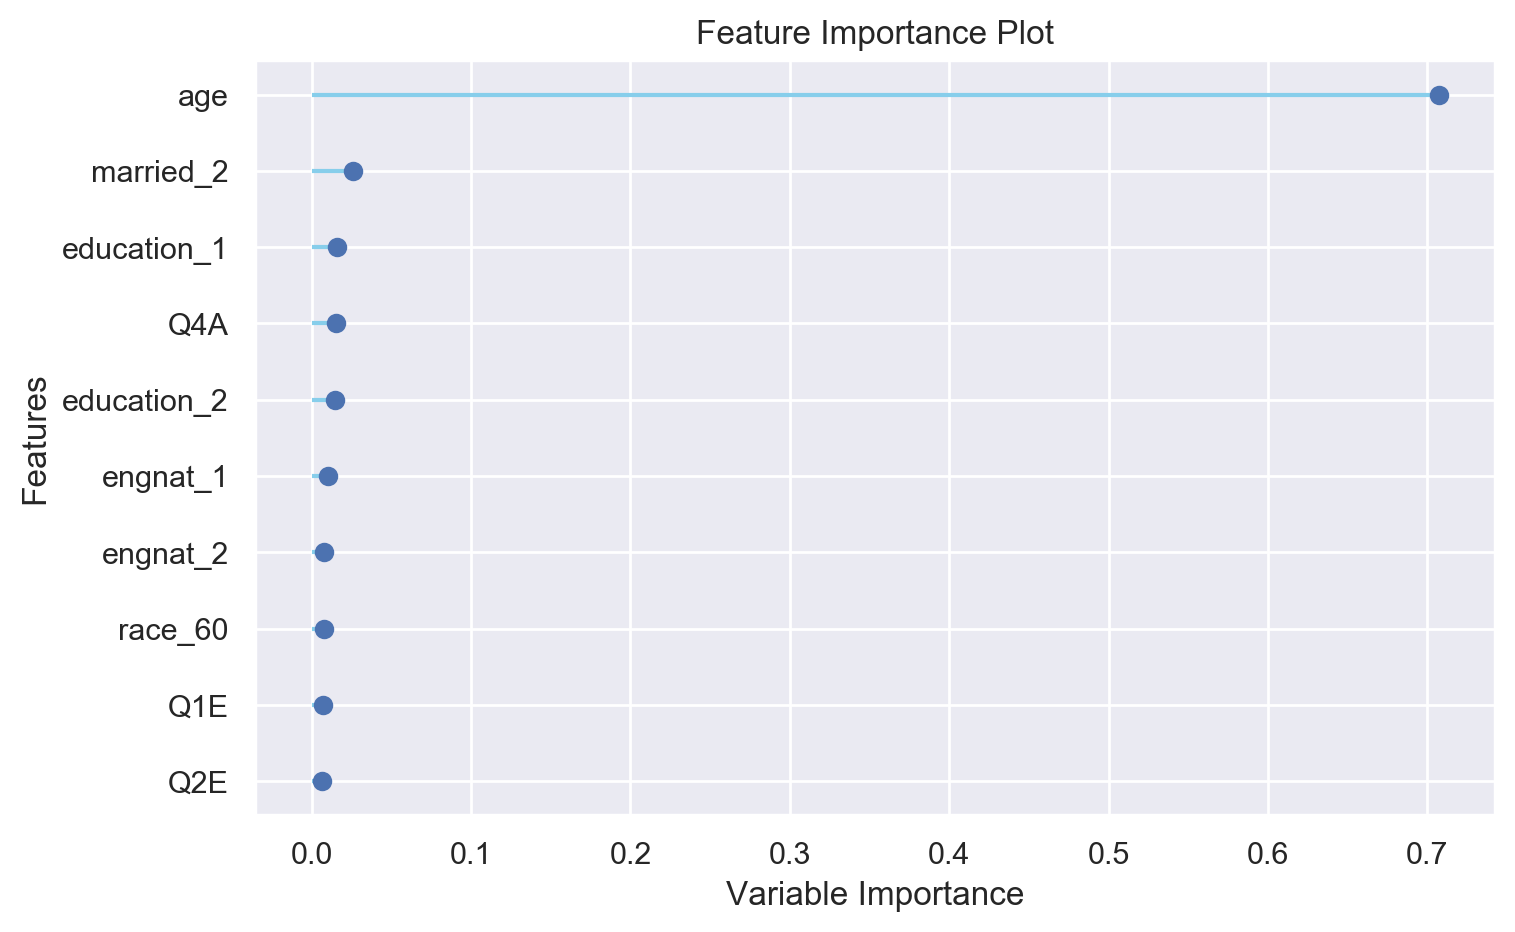

In [35]:
plot_model(estimator = gbc, plot = 'feature')

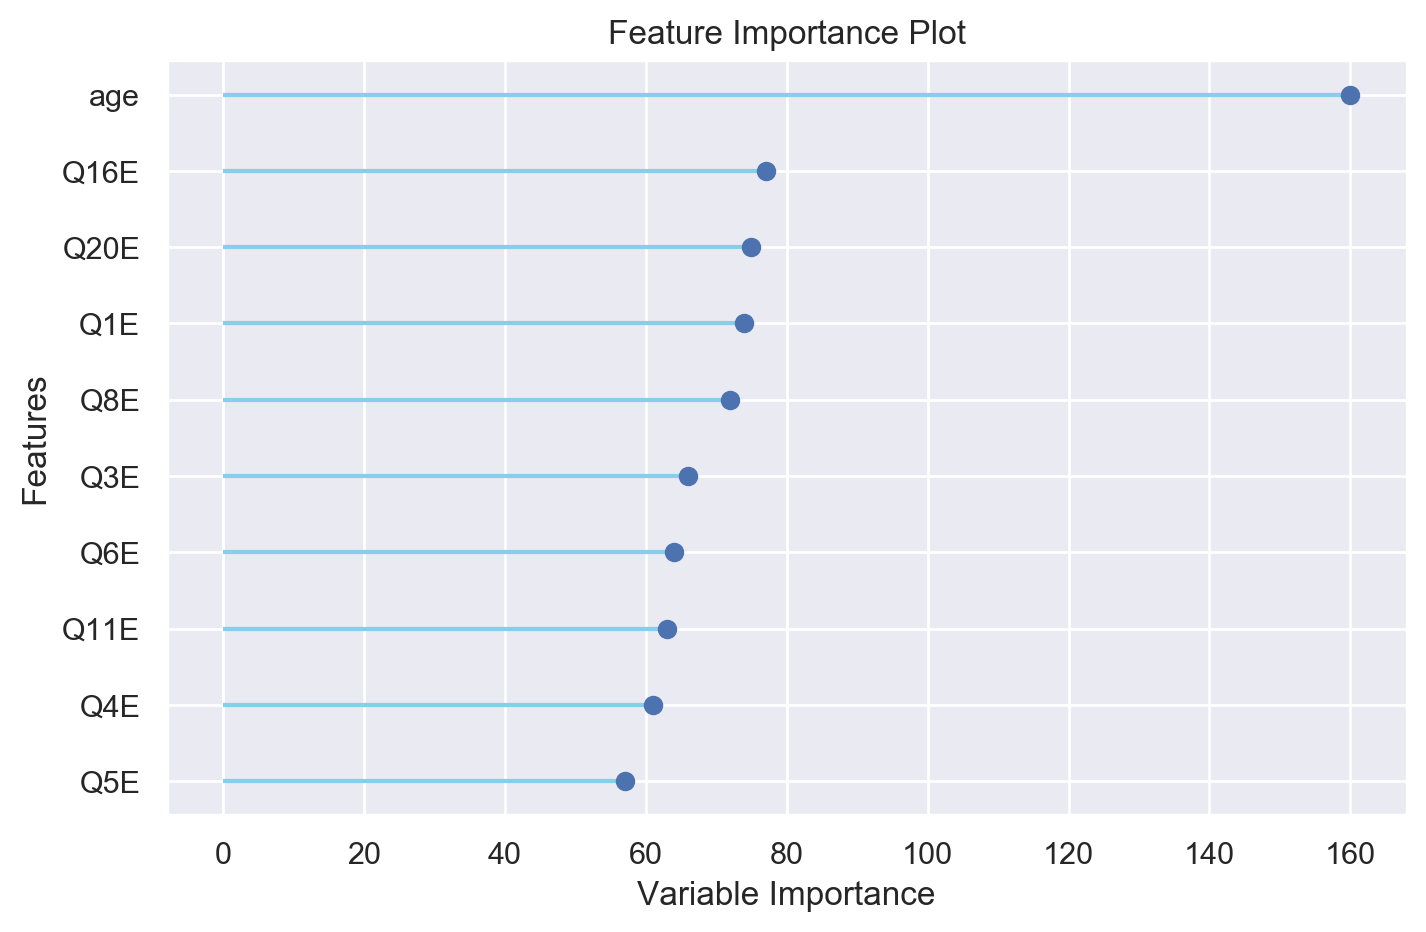

In [33]:
plot_model(estimator = lightgbm, plot = 'feature')

### with scaled data

#### maxabs_scaling

In [56]:
clf_maxabs = setup(data=data, target="voted", normalize=True, normalize_method = "maxabs")

Setup Succesfully Completed!


,Description,Value
0,session_id,1886
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(33959, 104)"
4,Missing Values,True
5,Numeric Features,67
6,Categorical Features,36
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [57]:
best_3 = compare_models(sort="AUC", n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.7344,0.8116,0.8317,0.6740,0.7445,0.4742,0.4857,5.3240
1,CatBoost Classifier,0.7300,0.8063,0.8242,0.6711,0.7396,0.4654,0.4763,5.0000
2,Light Gradient Boosting Machine,0.7292,0.8021,0.8188,0.6715,0.7377,0.4634,0.4735,0.3850
3,Linear Discriminant Analysis,0.7261,0.7973,0.7292,0.6963,0.7123,0.4512,0.4517,0.1545
4,Extra Trees Classifier,0.7275,0.7969,0.7500,0.6909,0.7192,0.4554,0.4569,0.2538
5,Ada Boost Classifier,0.7125,0.7962,0.7874,0.6607,0.7181,0.4294,0.4368,1.1944
6,Extreme Gradient Boosting,0.7104,0.7899,0.7618,0.6648,0.7097,0.4234,0.4279,6.1876
7,Logistic Regression,0.7198,0.7898,0.7177,0.6915,0.7043,0.4382,0.4386,0.1260
8,Random Forest Classifier,0.6784,0.7601,0.6047,0.6722,0.6362,0.3495,0.3515,0.1152
9,Naive Bayes,0.6721,0.7279,0.6535,0.6479,0.6482,0.3414,0.3437,0.0228


In [58]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7223,0.7900,0.8278,0.6602,0.7346,0.4510,0.4638
1,0.7069,0.7840,0.8218,0.6445,0.7224,0.4213,0.4354
2,0.7139,0.7952,0.8187,0.6530,0.7265,0.4344,0.4467
3,0.7475,0.8179,0.8489,0.6837,0.7574,0.5006,0.5134
4,0.7391,0.8079,0.8253,0.6816,0.7466,0.4828,0.4922
5,0.7588,0.8368,0.8343,0.7030,0.7631,0.5210,0.5289
6,0.7489,0.8241,0.8614,0.6826,0.7617,0.5039,0.5192
7,0.7461,0.8208,0.8283,0.6892,0.7524,0.4964,0.5053
8,0.6985,0.7963,0.7922,0.6430,0.7099,0.4030,0.4125
9,0.7616,0.8426,0.8584,0.6985,0.7703,0.5278,0.5400


In [59]:
catboost=create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7209,0.7856,0.8308,0.6579,0.7343,0.4486,0.4622
1,0.6999,0.7823,0.8187,0.6376,0.7169,0.4079,0.4224
2,0.7069,0.7935,0.8127,0.6466,0.7202,0.4207,0.4328
3,0.7419,0.8157,0.8338,0.6815,0.7500,0.4888,0.4995
4,0.7307,0.8085,0.8223,0.6724,0.7398,0.4665,0.4767
5,0.7489,0.8285,0.8102,0.6987,0.7503,0.5006,0.5062
6,0.7447,0.8180,0.8614,0.6777,0.7586,0.4958,0.5120
7,0.7461,0.8138,0.8313,0.6883,0.7531,0.4966,0.5060
8,0.7139,0.7908,0.7982,0.6592,0.7221,0.4327,0.4412
9,0.7461,0.8265,0.8223,0.6911,0.7510,0.4960,0.5038


In [60]:
lightgbm=create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7153,0.7777,0.7885,0.6624,0.7200,0.4348,0.4417
1,0.7335,0.7991,0.8459,0.6683,0.7467,0.4736,0.4884
2,0.7041,0.7912,0.8097,0.6442,0.7175,0.4151,0.4271
3,0.7349,0.8078,0.8248,0.6757,0.7429,0.4749,0.4849
4,0.7391,0.8031,0.8193,0.6834,0.7452,0.4824,0.4907
5,0.7588,0.8285,0.8373,0.7020,0.7637,0.5212,0.5297
6,0.7419,0.8145,0.8524,0.6770,0.7547,0.4899,0.5045
7,0.7279,0.8049,0.8133,0.6716,0.7357,0.4606,0.4695
8,0.6999,0.7826,0.8072,0.6411,0.7147,0.4068,0.4188
9,0.7363,0.8116,0.7892,0.6895,0.7360,0.4750,0.4794


In [61]:
best_3

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=1886, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=3

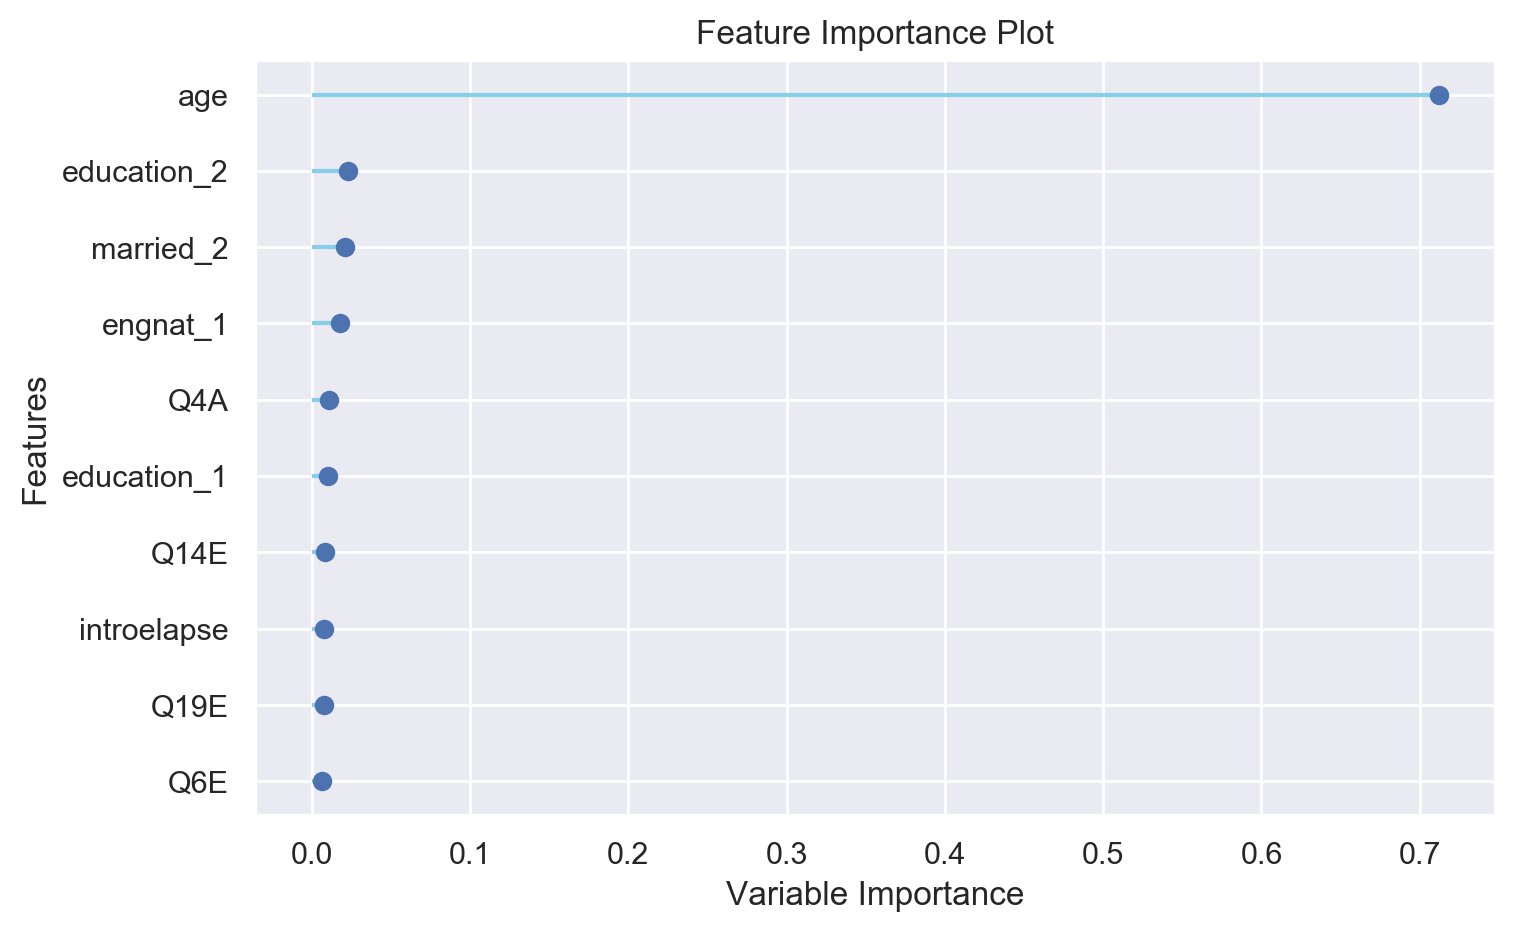

In [62]:
plot_model(estimator = gbc, plot = 'feature')

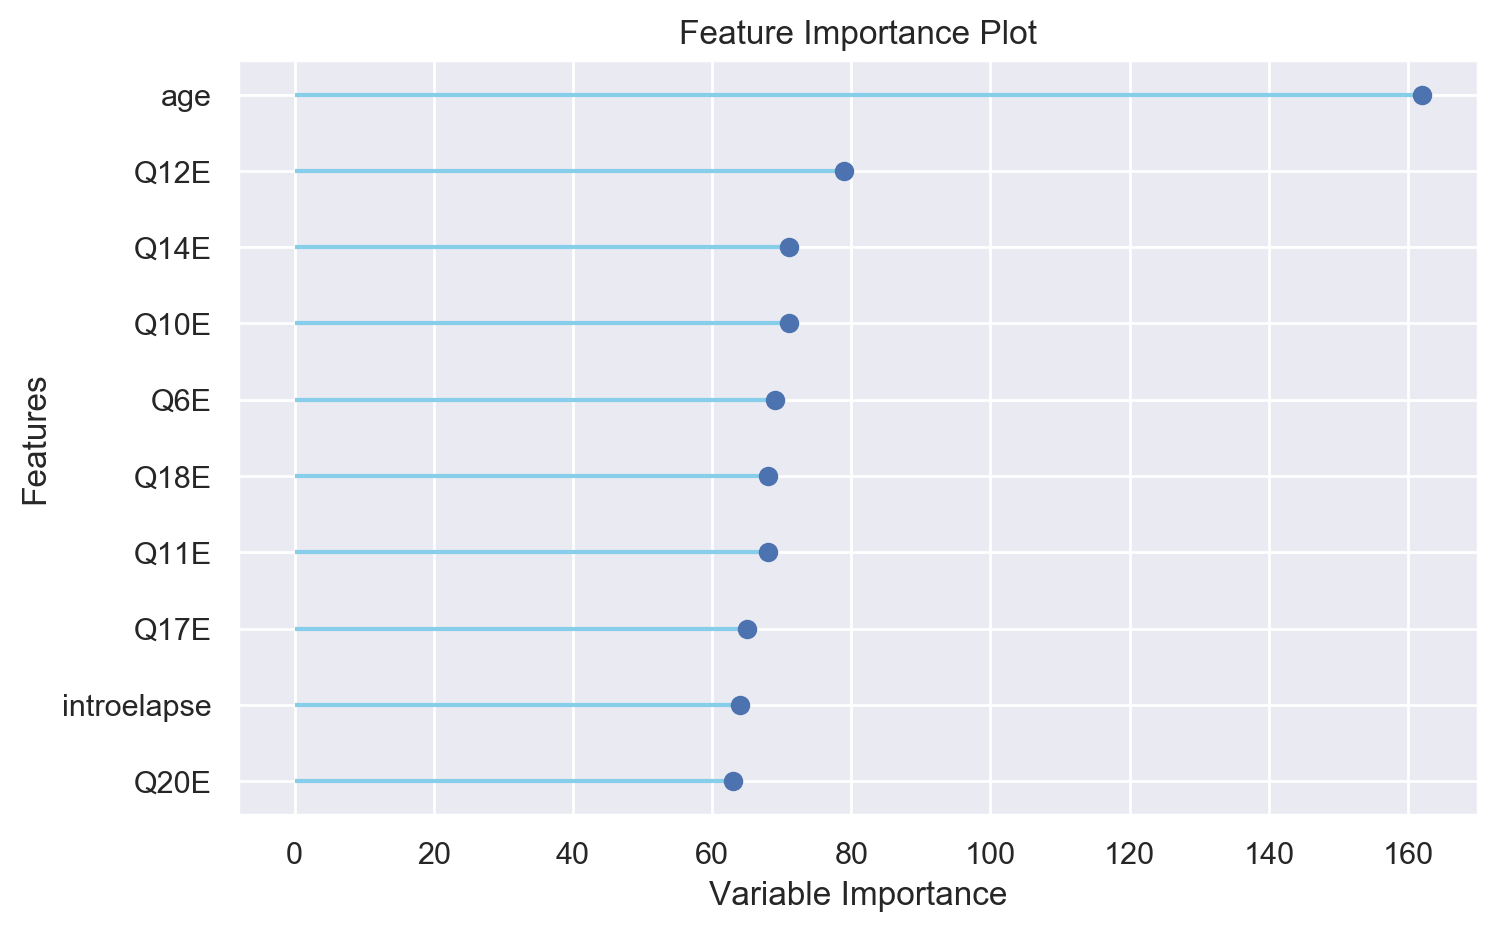

In [63]:
plot_model(estimator = lightgbm, plot = 'feature')

#### robust_scaling

In [65]:
clf_robust = setup(data=data, target="voted", normalize=True, normalize_method = "robust")

Setup Succesfully Completed!


,Description,Value
0,session_id,5495
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(33959, 104)"
4,Missing Values,True
5,Numeric Features,67
6,Categorical Features,36
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [66]:
best_3 = compare_models(sort="AUC", n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Gradient Boosting Classifier,0.7272,0.8041,0.8378,0.6643,0.7407,0.4610,0.4755,5.5782
1,CatBoost Classifier,0.7269,0.8040,0.8230,0.6680,0.7371,0.4594,0.4709,5.0318
2,Light Gradient Boosting Machine,0.7210,0.7974,0.8034,0.6663,0.7281,0.4468,0.4557,0.3965
3,Extra Trees Classifier,0.7135,0.7867,0.7165,0.6836,0.6993,0.4260,0.4269,0.2641
4,Ada Boost Classifier,0.7087,0.7836,0.7871,0.6561,0.7153,0.4221,0.4301,1.3402
5,Linear Discriminant Analysis,0.7178,0.7832,0.7162,0.6896,0.7023,0.4343,0.4351,0.1532
6,Extreme Gradient Boosting,0.7093,0.7823,0.7621,0.6637,0.7090,0.4213,0.4261,6.1915
7,Random Forest Classifier,0.6628,0.7476,0.5724,0.6587,0.6120,0.3165,0.3193,0.1159
8,Logistic Regression,0.5746,0.6736,0.1430,0.7103,0.2377,0.0980,0.1584,0.2507
9,Decision Tree Classifier,0.6582,0.6565,0.6318,0.6332,0.6323,0.3130,0.3132,0.2750


In [67]:
gbc=create_model("gbc")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6844,0.7768,0.7946,0.6262,0.7004,0.3768,0.3888
1,0.7265,0.7970,0.8459,0.6604,0.7417,0.4603,0.4764
2,0.7532,0.8272,0.8701,0.6841,0.7660,0.5126,0.5293
3,0.7391,0.8089,0.8369,0.6773,0.7486,0.4837,0.4955
4,0.7321,0.8088,0.8675,0.6621,0.7510,0.4722,0.4926
5,0.7447,0.8148,0.7982,0.6974,0.7444,0.4918,0.4963
6,0.7195,0.7993,0.8042,0.6642,0.7275,0.4439,0.4525
7,0.7139,0.7975,0.8554,0.6455,0.7358,0.4368,0.4576
8,0.7237,0.7973,0.8494,0.6573,0.7411,0.4550,0.4723
9,0.7349,0.8128,0.8554,0.6682,0.7503,0.4768,0.4934


In [68]:
catboost=create_model("catboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7041,0.7788,0.8127,0.6435,0.7183,0.4153,0.4280
1,0.7195,0.8000,0.8097,0.6617,0.7283,0.4444,0.4541
2,0.7419,0.8195,0.8489,0.6771,0.7534,0.4899,0.5037
3,0.7335,0.8093,0.8308,0.6724,0.7432,0.4726,0.4841
4,0.7307,0.8107,0.8524,0.6643,0.7467,0.4686,0.4853
5,0.7532,0.8237,0.7861,0.7131,0.7479,0.5072,0.5095
6,0.7209,0.7992,0.7922,0.6692,0.7255,0.4457,0.4523
7,0.7055,0.7904,0.8102,0.6466,0.7193,0.4176,0.4294
8,0.7279,0.7888,0.8343,0.6659,0.7406,0.4620,0.4751
9,0.7321,0.8201,0.8524,0.6659,0.7477,0.4712,0.4877


In [69]:
lightgbm=create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7055,0.7648,0.8097,0.6458,0.7185,0.4178,0.4296
1,0.7139,0.7909,0.7976,0.6584,0.7213,0.4328,0.4413
2,0.7447,0.8191,0.8187,0.6896,0.7486,0.4932,0.5007
3,0.7181,0.7969,0.7976,0.6633,0.7243,0.4408,0.4487
4,0.7251,0.8052,0.8373,0.6619,0.7394,0.4569,0.4711
5,0.7335,0.8157,0.7560,0.6972,0.7254,0.4674,0.4688
6,0.7139,0.7969,0.7681,0.6675,0.7143,0.4306,0.4348
7,0.6957,0.7905,0.7922,0.6399,0.7079,0.3976,0.4076
8,0.7167,0.7874,0.8072,0.6601,0.7263,0.4387,0.4483
9,0.7433,0.8064,0.8494,0.6795,0.7550,0.4924,0.5060


In [70]:
best_3

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=100,
                            n_iter_no_change=None, presort='deprecated',
                            random_state=5495, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=3

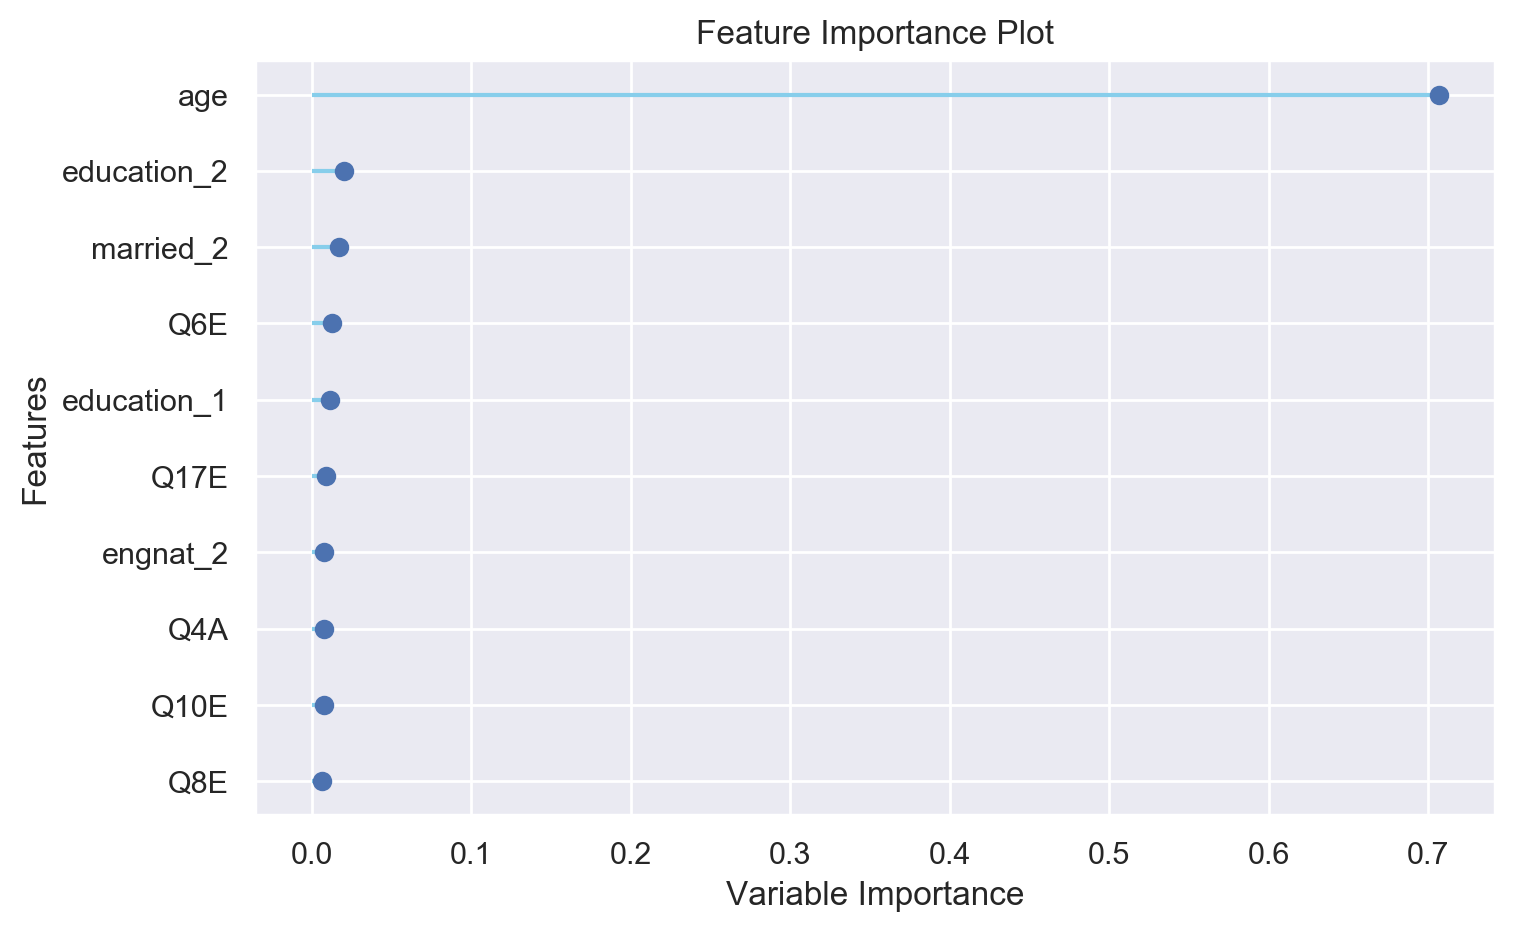

In [71]:
plot_model(estimator = gbc, plot = 'feature')

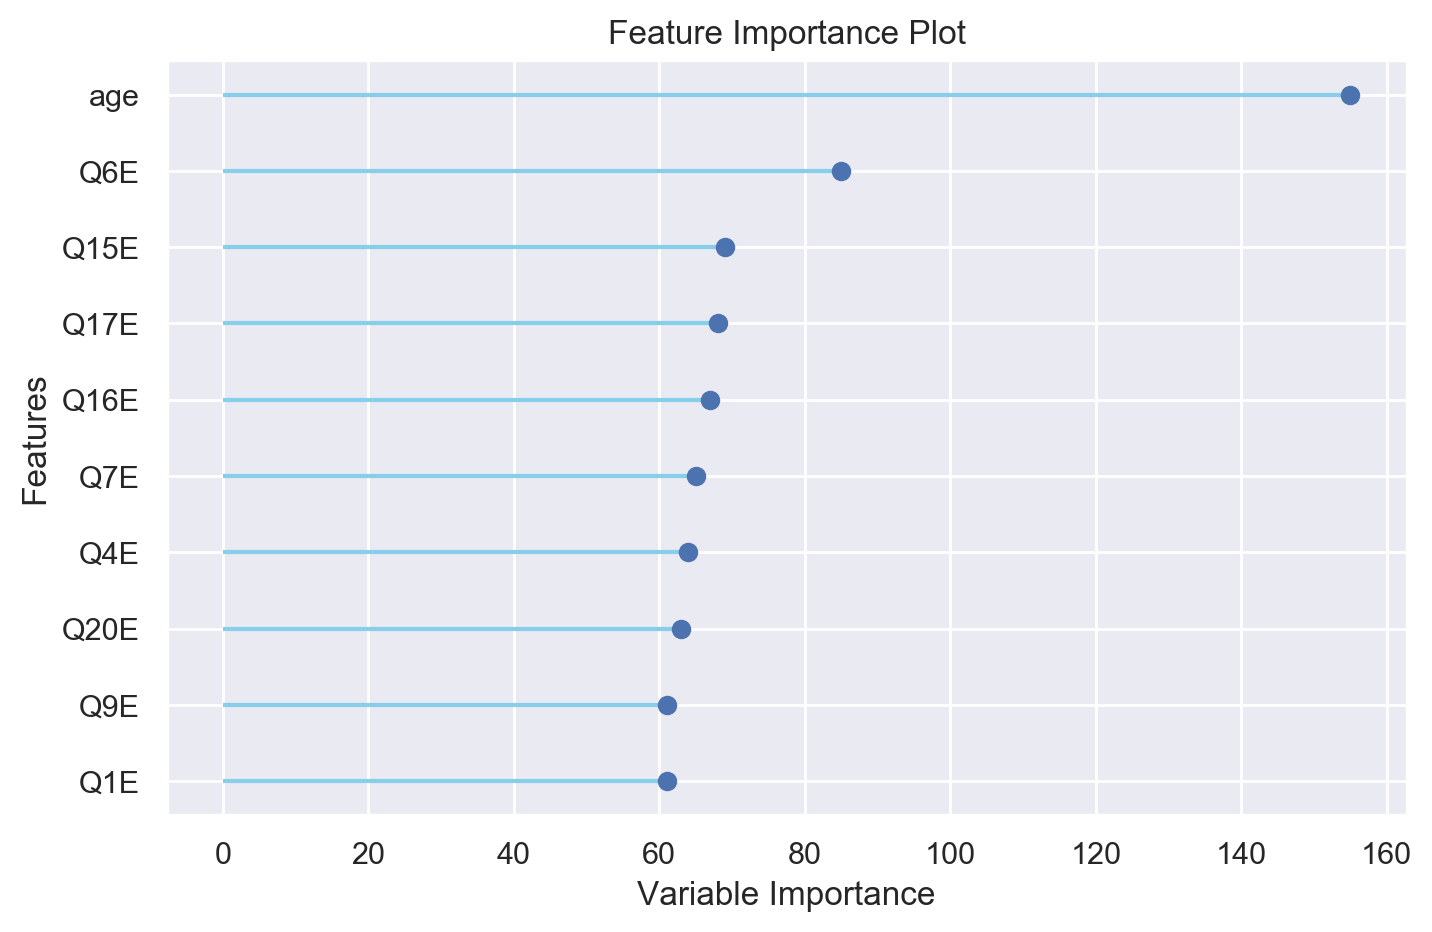

In [72]:
plot_model(estimator = lightgbm, plot = 'feature')

### without AGE, Q_E, Q_I column

In [7]:
data_nonage = data.drop(columns = "age")

In [10]:
cols = []
for i in data_nonage.columns:
    if ('E' in i) | ('I' in i) & ('T' not in i):
        cols.append(i)
cols

['Q1I',
 'Q1E',
 'Q2I',
 'Q2E',
 'Q3I',
 'Q3E',
 'Q4I',
 'Q4E',
 'Q5I',
 'Q5E',
 'Q6I',
 'Q6E',
 'Q7I',
 'Q7E',
 'Q8I',
 'Q8E',
 'Q9I',
 'Q9E',
 'Q10I',
 'Q10E',
 'Q11I',
 'Q11E',
 'Q12I',
 'Q12E',
 'Q13I',
 'Q13E',
 'Q14I',
 'Q14E',
 'Q15I',
 'Q15E',
 'Q16I',
 'Q16E',
 'Q17I',
 'Q17E',
 'Q18I',
 'Q18E',
 'Q19I',
 'Q19E',
 'Q20I',
 'Q20E']

In [12]:
data_noageEI = data_nonage.drop(cols, axis=1)

In [13]:
data_noageEI.shape

(33959, 63)

In [14]:
clf = setup(data=data_noageEI, target="voted", normalize=True, normalize_method = "maxabs")

,Description,Value
0,session_id,7709
1,Target,voted
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(33959, 63)"
5,Missing Values,True
6,Numeric Features,26
7,Categorical Features,36
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
compare_models(sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7213,0.7918,0.7236,0.7259,0.7216,0.4440,0.4465,1.3380
catboost,CatBoost Classifier,0.7211,0.7913,0.7225,0.7242,0.7214,0.4425,0.4440,12.1610
lightgbm,Light Gradient Boosting Machine,0.7203,0.7901,0.7225,0.7248,0.7206,0.4419,0.4443,0.2480
lda,Linear Discriminant Analysis,0.7190,0.7897,0.7191,0.7204,0.7192,0.4368,0.4375,0.2590
lr,Logistic Regression,0.7175,0.7893,0.7174,0.7188,0.7177,0.4337,0.4342,1.7580
ada,Ada Boost Classifier,0.7153,0.7882,0.7149,0.7163,0.7155,0.4289,0.4293,0.3220
et,Extra Trees Classifier,0.7177,0.7879,0.7188,0.7204,0.7180,0.4354,0.4366,1.3030
rf,Random Forest Classifier,0.7189,0.7867,0.7200,0.7217,0.7191,0.4378,0.4392,0.9030
xgboost,Extreme Gradient Boosting,0.7028,0.7718,0.7036,0.7051,0.7031,0.4053,0.4062,3.4310
nb,Naive Bayes,0.6511,0.7445,0.6648,0.6974,0.6393,0.3198,0.3538,0.0360


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=7709, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

#### gbc

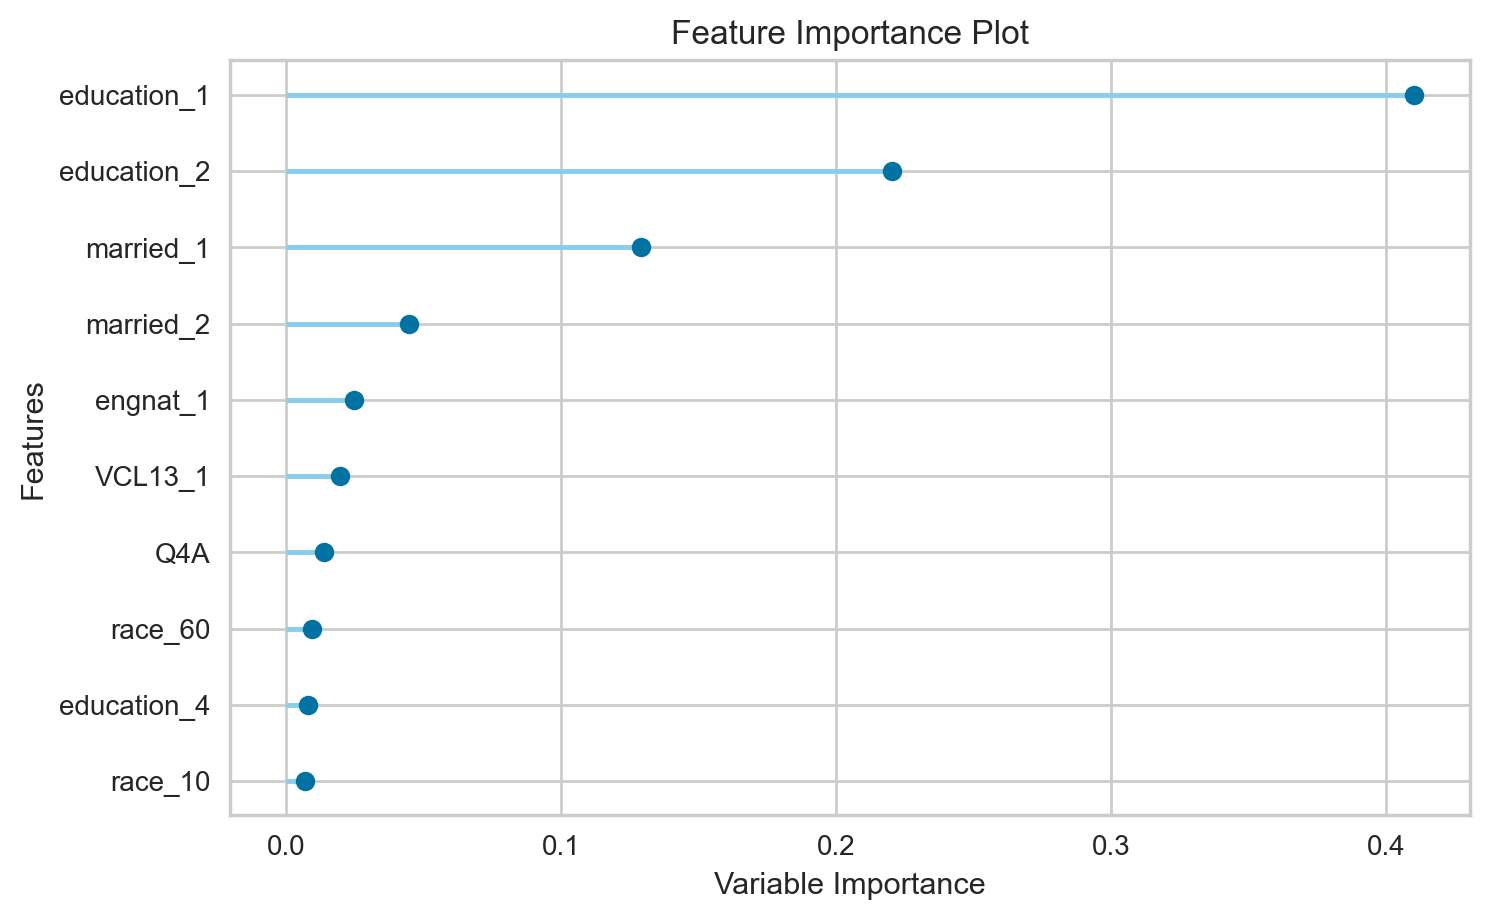

In [16]:
gbc = create_model('gbc')
plot_model(estimator = gbc, plot='feature')

In [17]:
score_gbc_raw = pull()
score_gbc_raw.loc['Mean']['AUC']

0.7918

#### catboost

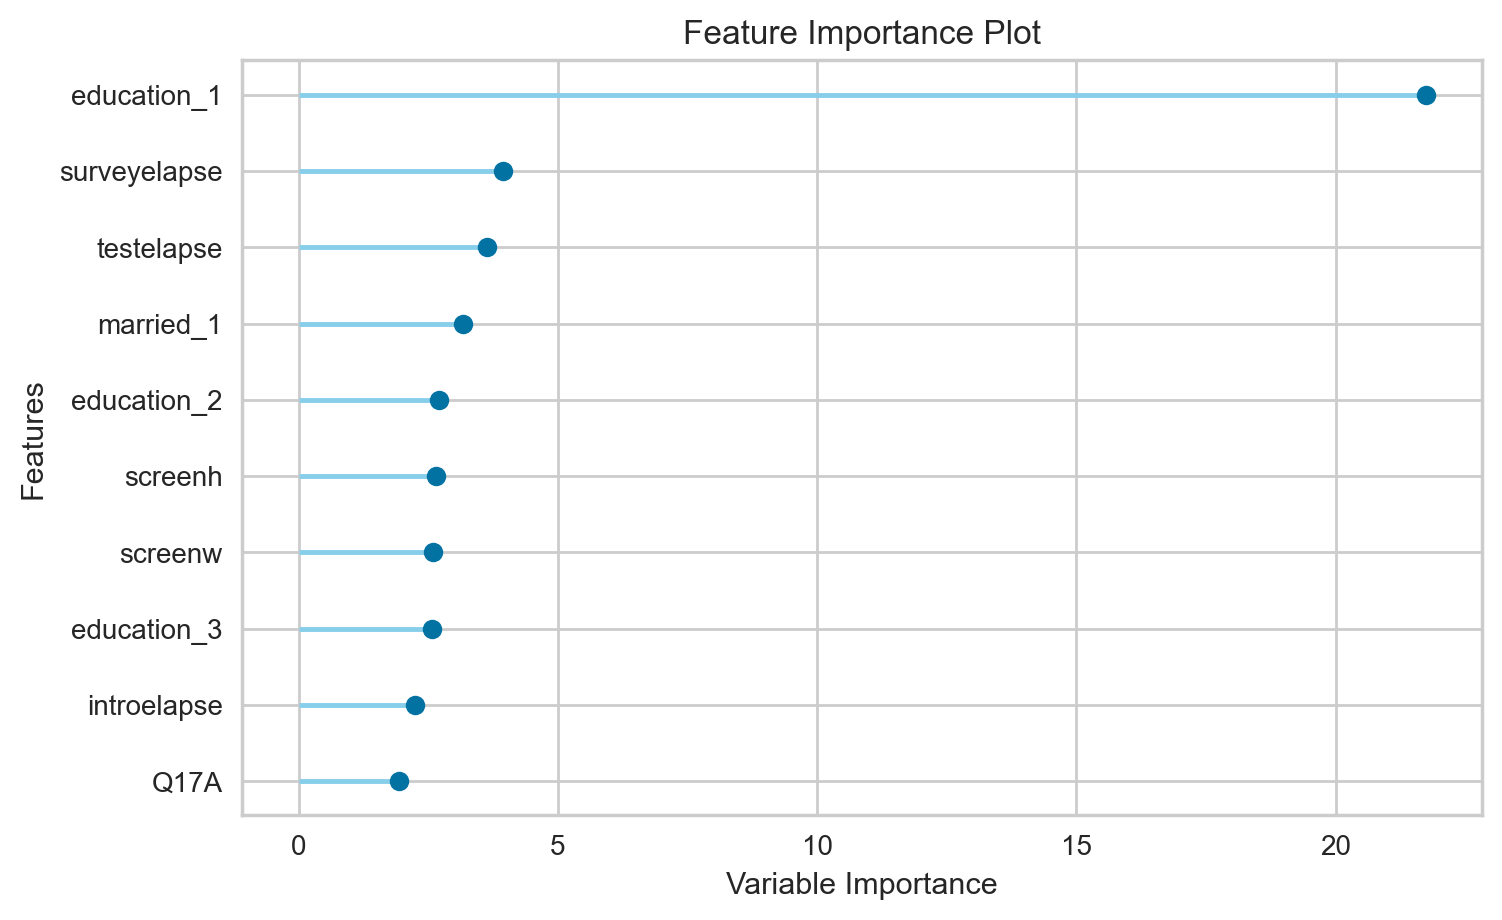

In [18]:
catboost = create_model('catboost')
plot_model(estimator = catboost, plot='feature')

In [19]:
score_cat_raw = pull()
score_cat_raw.loc['Mean']['AUC']

0.7913

#### lightgbm

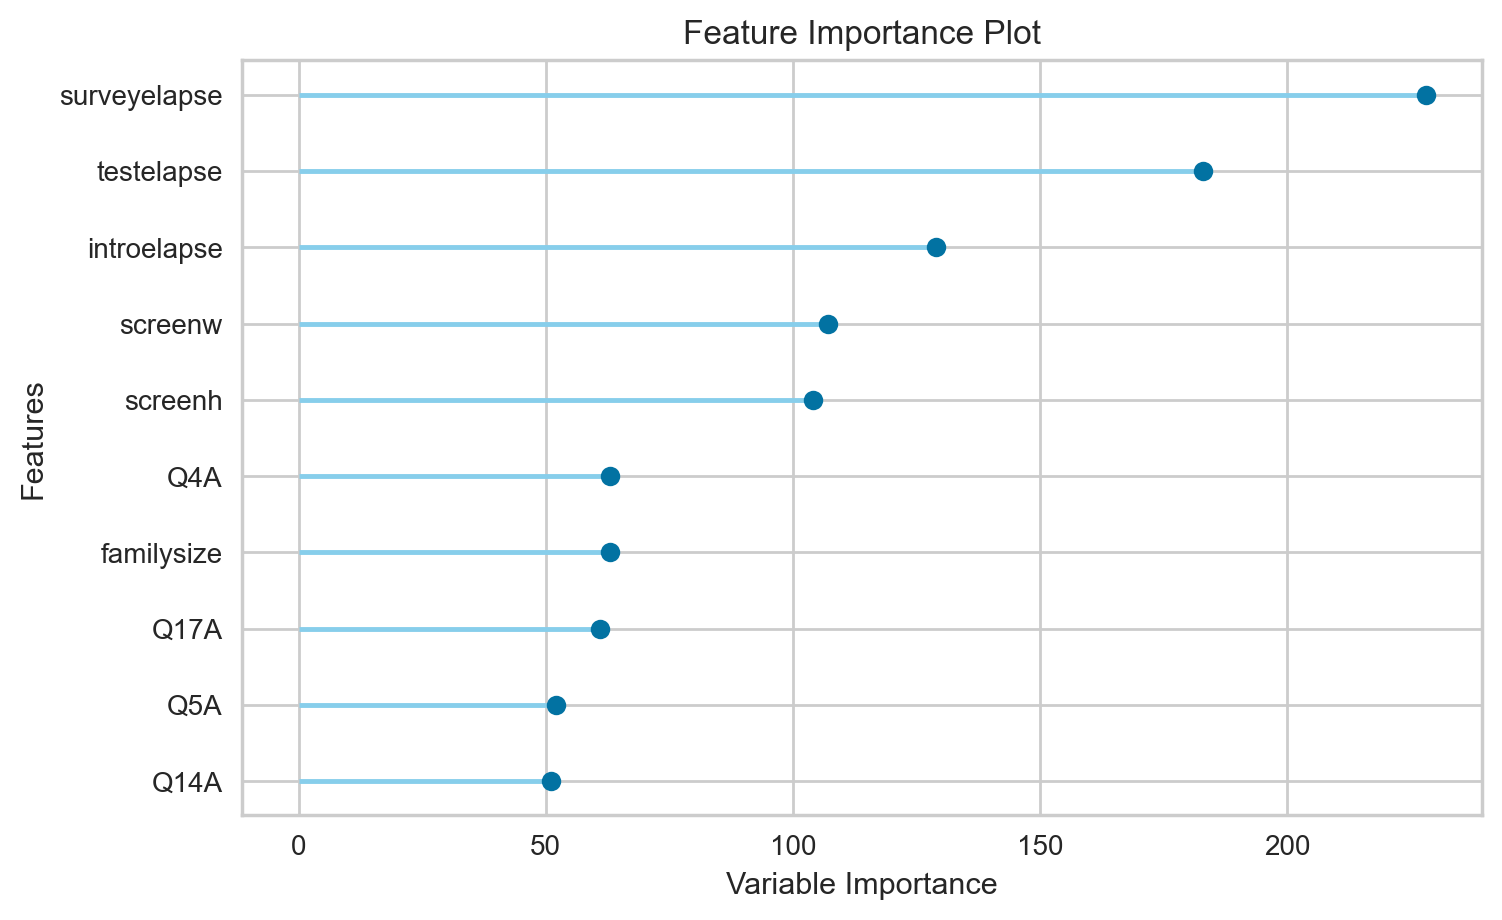

In [20]:
lightgbm = create_model('lightgbm')
plot_model(estimator = lightgbm, plot='feature')

In [21]:
score_lightgbm_raw = pull()
score_lightgbm_raw.loc['Mean']['AUC']

0.7901

#### lda(Linear Discriminant Analysis) 

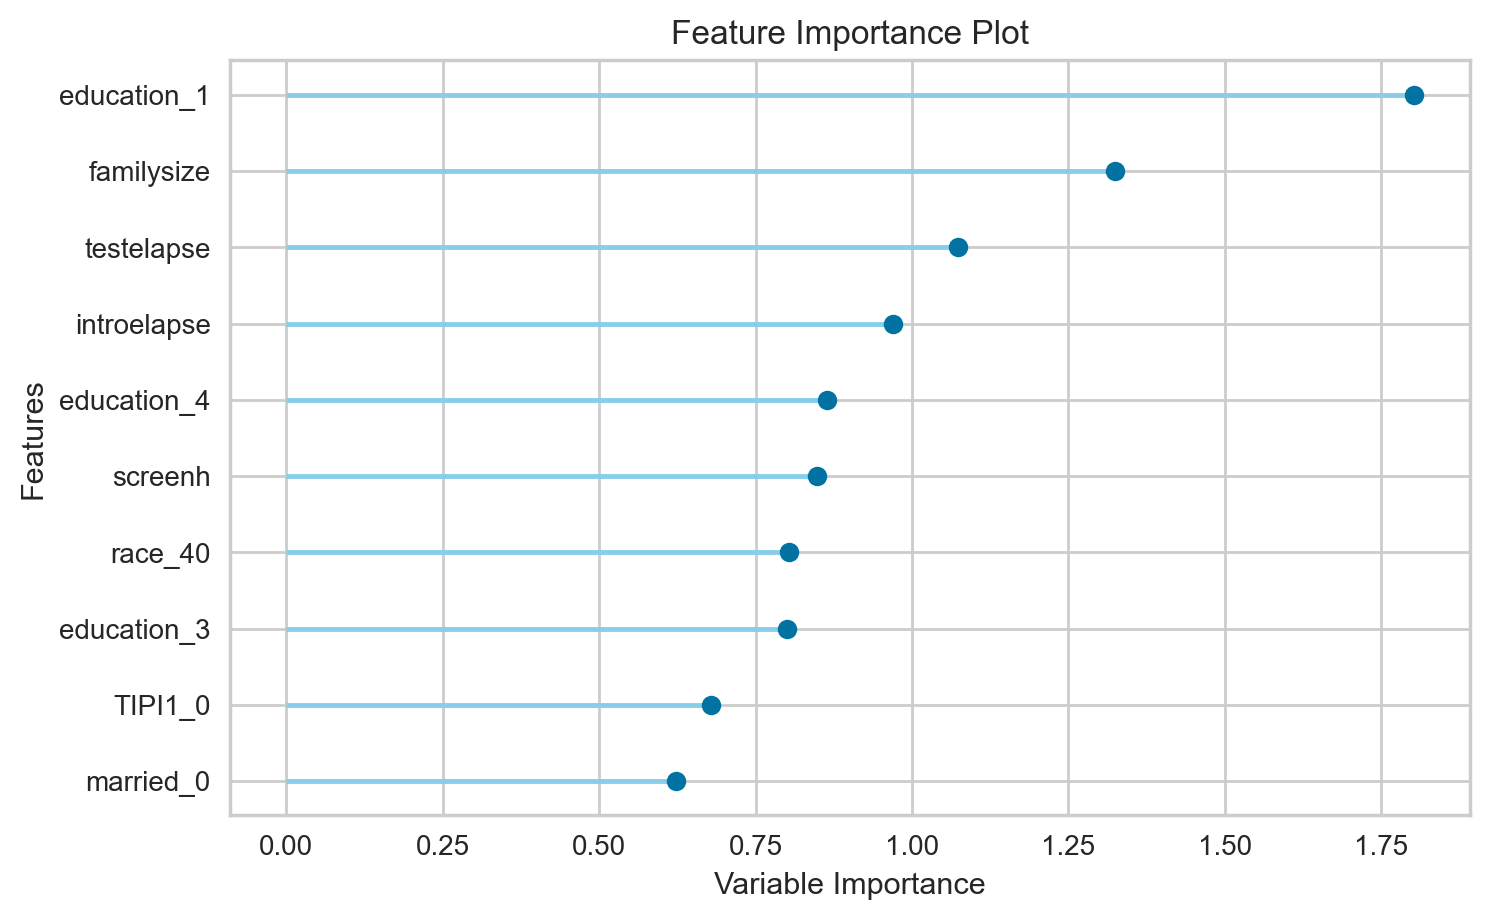

In [22]:
lda = create_model('lda')
plot_model(estimator = lda, plot='feature')

In [23]:
score_lda_raw = pull()
score_lda_raw.loc['Mean']['AUC']

0.7897

In [31]:
raw_df = []
raw_df.append({
    'cat' : score_cat_raw.loc["Mean"]['AUC'], 
    'gbc' : score_gbc_raw.loc['Mean']['AUC'],
    'lightgbm' : score_lightgbm_raw.loc['Mean']['AUC'],
    'lda' : score_lda_raw.loc['Mean']['AUC']
})
raw_df = pd.DataFrame(raw_df, index=['RAW'])
raw_df

,cat,gbc,lightgbm,lda
RAW,0.7913,0.7918,0.7901,0.7897


### compare RAW, IQR, AVG

In [32]:
avg_iqr_df = pd.read_csv('./MACH_data/avg_iqr_df.csv', index_col=0)

In [34]:
raw_avg_iqr_df = pd.concat([raw_df, avg_iqr_df])
raw_avg_iqr_df

,cat,gbc,lightgbm,lda
RAW,0.7913,0.7918,0.7901,0.7897
AVG,0.7915,0.7938,0.7918,0.7890
IQR,0.7839,0.7874,0.7858,0.7844


In [39]:
import matplotlib.pyplot as plt

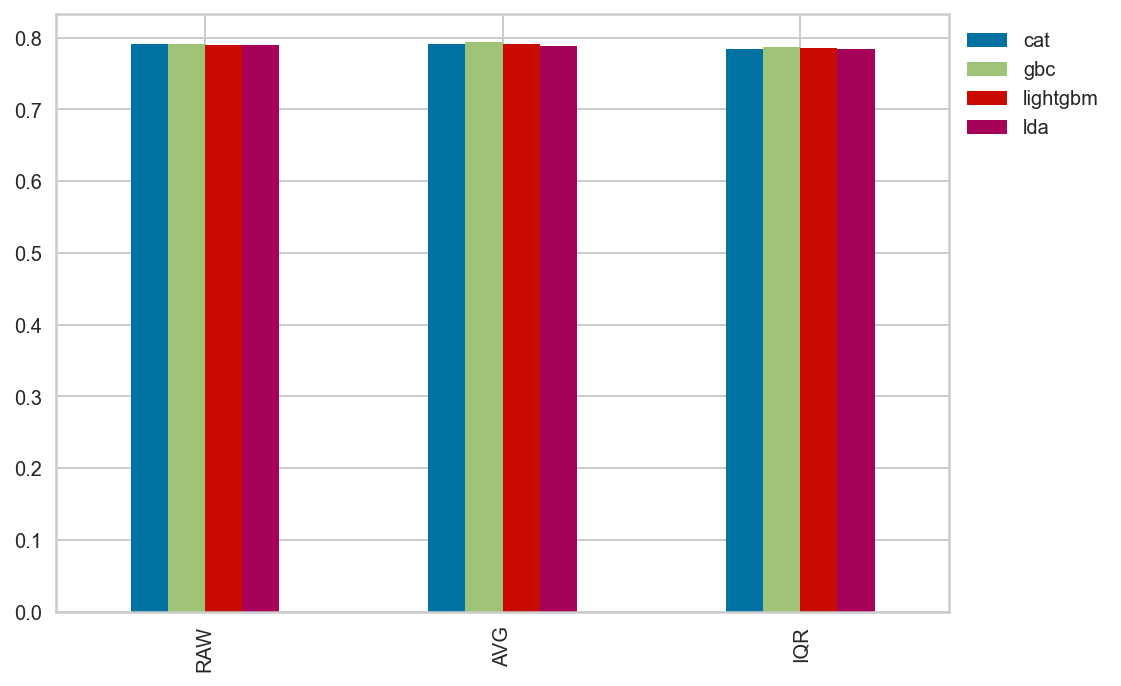

In [43]:
raw_avg_iqr_df.plot(kind='bar')
plt.legend(bbox_to_anchor=(1, 1));

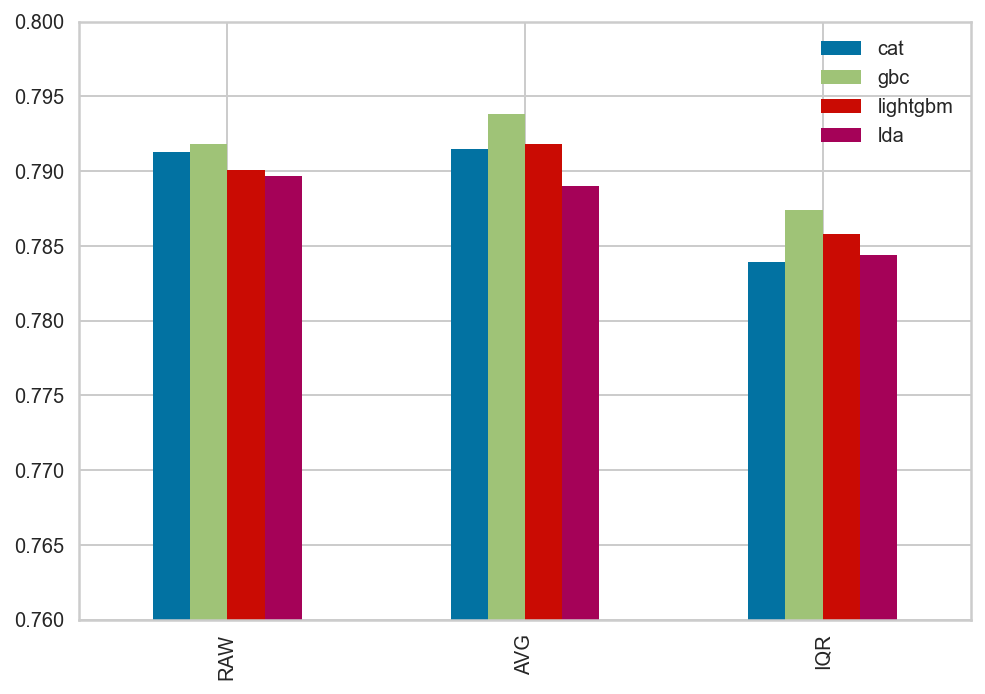

In [45]:
raw_avg_iqr_df.plot(kind='bar', ylim=(0.76, 0.8))
plt.legend(bbox_to_anchor=(1, 1));